In [53]:
from ipywidgets import *
%matplotlib inline
import pylab as pl
from numpy import pi
pl.rcParams['figure.figsize'] = (10, 10)
pl.rcParams['font.size'] = 22
# R,G,c1,c2=pl.loadtxt("/Users/ft14968/EXPERIMENTS/g.txt", unpack=True)
R,G,I=pl.loadtxt("/Users/ft14968/CheckingSoftness/gr_be10ka1.txt", unpack=True)
    

In [54]:


def c0(eta):
    return -(1.+2.*eta)**2/(1.-eta)**4
def c1(eta):
    return 6.*eta*(1.+eta*0.5)**2/(1.-eta)**4
def c3(eta):
    return eta*0.5*c0(eta)
def cc(r,eta):
    if r>1:
        return 0
    else:
        return c0(eta)+c1(eta)*r+c3(eta)*r**3
# Spherical Fourier Transforms (using the liquid isotropicity)
def spherical_FT(f,k,r,dr):
    ft=pl.zeros(len(k))
    for i in range(len(k)):
        ft[i]=4.*pi*pl.sum(r*pl.sin(k[i]*r)*f*dr)/k[i]
    return ft

def inverse_spherical_FT(ff,k,r,dk):
    ift=pl.zeros(len(r))
    for i in range(len(r)):
        ift[i]=pl.sum(k*pl.sin(k*r[i])*ff*dk)/r[i]/(2*pi**2)
    return ift



def PercusYevickHS(phi, Sigma):
    # number density
    rho=6./pi*phi
    # getting the direct correlation function c(r) from the analytic Percus-Yevick solution
    # vectorizing the function
    c=pl.vectorize(cc)
    # space discretization
    dr=0.005
    r=pl.arange(1,1024*2+1,1 )*dr
    # reciprocal space discretization (highest available frequency)
    dk=1/r[-1]
    k=pl.arange(1,1024*2+1,1 )*dk
    # direct correlation function c(r)
    c_direct=c(r,phi)
    # getting the Fourier transform
    ft_c_direct=spherical_FT(c_direct, k,r,dr)
    # using the Ornstein-Zernike equation, getting the structure factor
    ft_h=ft_c_direct/(1.-rho*ft_c_direct)
    # inverse Fourier transform
    h=inverse_spherical_FT(ft_h, k,r,dk)
    # print h
    # # radial distribution function
    gg=h+1
    # clean the r<1 region
    g=pl.zeros(len(gg))
    g[r>=1]=gg[r>=1]
    pl.clf()
    pl.semilogy(r,abs((g-1)*r))
   
    pl.ylabel("|(g(r)-1)r|")
    pl.xlabel("r")
    
#     plot experiment
    RR=R/Sigma
    pl.semilogy(RR,abs((G-1)*RR), '--og', ms=6, mfc='none', mec='g')
    
    pl.ylim(0.001,10)
    pl.xlim(0,5)

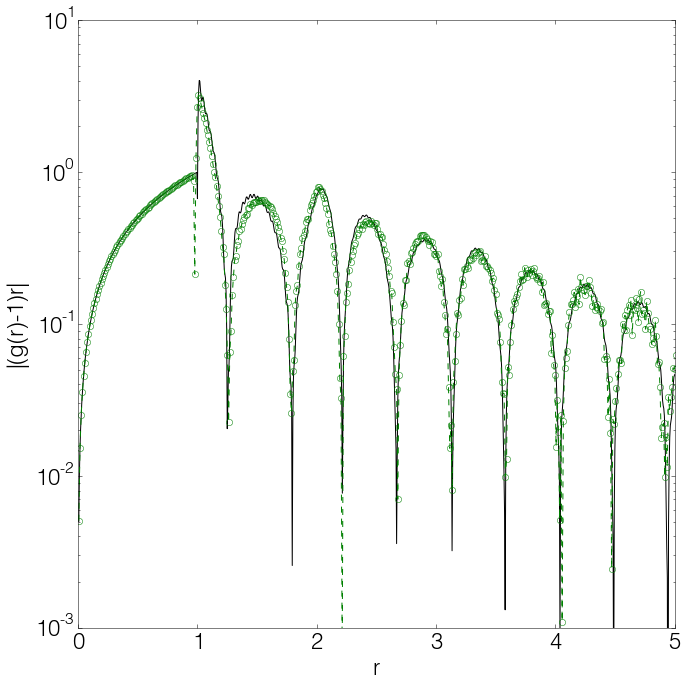

In [55]:
interact(PercusYevickHS,phi=(0.40,0.56,0.001), Sigma=(0.8,1.2,0.001))

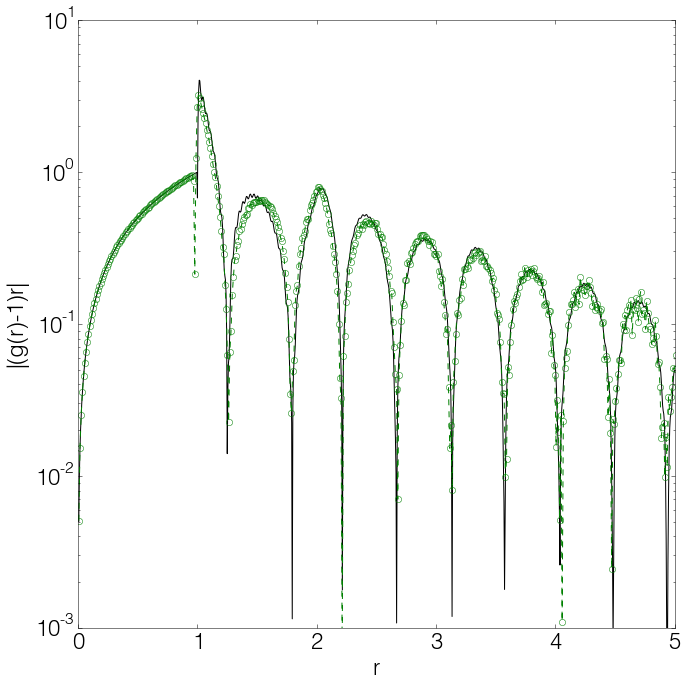

In [56]:
pl.figure()
PercusYevickHS(0.50,0.987)
pl.savefig("phi0.50_sigma0.987.pdf")